# Visualizing Latent Space

In [1]:
import pickle as pk
import phate
import torch
import matplotlib.pyplot as plt
with open('../latent_embeddings_deshaw.pkl', 'rb') as file: 
    # Load the data from the pickle file
    z_rep = pk.load(file)

with open('../times_deshaw.pkl', 'rb') as file: 
    # Load the data from the pickle file
    times = pk.load(file)

In [2]:
z_rep = torch.cat(z_rep, dim=0)

Calculating TPHATE...
  Running TPHATE on 7988 observations and 64 variables.
  Landmarking not recommended; setting n_landmark to 7988
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.40 seconds.
    Calculating affinities...
    Calculated affinities in 0.04 seconds.
  Calculated graph and diffusion operator in 0.45 seconds.
  Learning the autocorrelation function...


/gpfs/gibbs/project/krishnaswamy_smita/sv496/conda_envs/mfcn/lib/python3.9/site-packages/tphate/graphs.py:297: RuntimeWarning: Detected zero distance between 32 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(


  Calculating Autocorr kernel...
    Dropoff point: 1
  Combining PHATE operator and autocorr operator
  No autocorrelation measured; converging with PHATE
  Calculating optimal t...
    Automatically selected t = 20
  Calculated optimal t in 119.45 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 15.09 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 4648.65 seconds.
Calculated TPHATE in 4792.89 seconds.


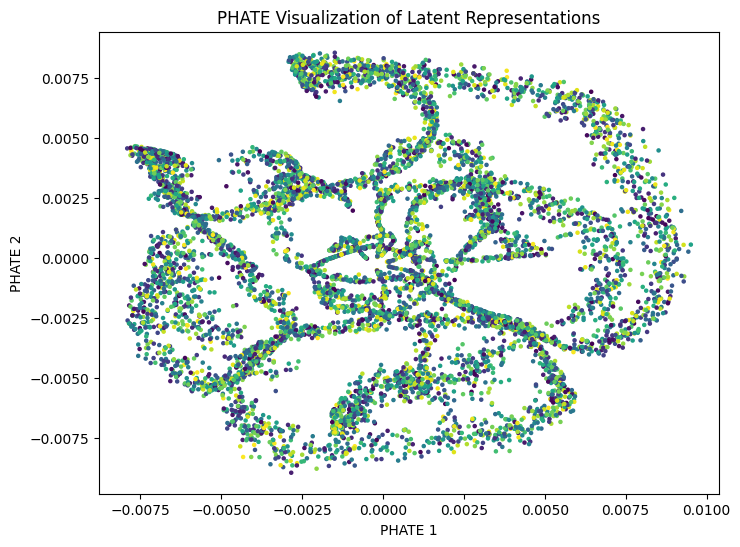

In [4]:
import tphate

tphate_op = tphate.TPHATE(n_components=3)
data_tphate = tphate_op.fit_transform(z_rep)

# Visualize the latent representation
plt.figure(figsize=(8, 6))
plt.scatter(data_tphate[:, 0], data_tphate[:, 1], s=5, c=times, cmap='viridis')
plt.xlabel('PHATE 1')
plt.ylabel('PHATE 2')
plt.title('PHATE Visualization of Latent Representations')
plt.show()